#### Yao - Moloco Data Scientist Interview Question.ipynb

In [1]:
import pandas as pd
from datetime import datetime
df = pd.read_excel('Adops & Data Scientist Sample Data.xlsx')
df['ts'] = pd.to_datetime(df['ts'])
df = df.sort_values('ts')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3553 entries, 0 to 3552
Data columns (total 4 columns):
ts            3553 non-null datetime64[ns]
user_id       3553 non-null object
country_id    3553 non-null object
site_id       3553 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 138.8+ KB


,ts,user_id,country_id,site_id
0,2019-02-01 00:01:24,LC36FC,TL6,N0OTG
1,2019-02-01 00:10:19,LC39B6,TL6,N0OTG
2,2019-02-01 00:21:50,LC3500,TL6,N0OTG
3,2019-02-01 00:22:50,LC374F,TL6,N0OTG
4,2019-02-01 00:23:44,LCC1C3,TL6,QGO3G
...,...,...,...,...
3548,2019-02-07 23:56:57,LC3F13,TL6,QGO3G
3549,2019-02-07 23:58:36,LC3842,HVQ,3POLC
3550,2019-02-07 23:58:56,LC35EB,TL6,QGO3G
3551,2019-02-07 23:59:19,LC3842,HVQ,3POLC


1) Consider only the rows with country_id = "BDV" (there are 844 such rows). For each site_id, we can compute the number of unique user_id's found in these 844 rows. Which site_id has the largest number of unique users? And what's the number?

### When country_id = "BDV", site_id '5NPAU' has the largest number of unique users with an unique user count of 544.

In [2]:
df[df['country_id']=='BDV'].groupby('site_id')['user_id'].nunique().reset_index(name='count').sort_values('count', ascending=False).reset_index(drop=True)

,site_id,count
0,5NPAU,544
1,N0OTG,90
2,3POLC,2


2) Between 2019-02-03 00:00:00 and 2019-02-04 23:59:59, there are four users who visited a certain site more than 10 times. Find these four users & which sites they (each) visited more than 10 times. (Simply provides four triples in the form (user_id, site_id, number of visits) in the box below.)

### For the 4 users that visited sites more than 10 times between 2/3/19 and 2/5/19, they include: 'LC3A59' (26 times), 'LC06C3' (25 times), 'LC3C9D' (17 times), and 'LC3C7E' (15 times).

In [3]:
df[(df['ts'] > '2019-02-03') & (df['ts'] < '2019-02-05')].groupby('site_id')['user_id'].value_counts().reset_index(name='count').query("count >= 10").sort_values('count', ascending=False).reset_index(drop=True)

,site_id,user_id,count
0,N0OTG,LC3A59,26
1,N0OTG,LC06C3,25
2,N0OTG,LC3C9D,17
3,3POLC,LC3C7E,15


3) For each site, compute the unique number of users whose last visit (found in the original data set) was to that site. For instance, user "LC3561"'s last visit is to "N0OTG" based on timestamp data. Based on this measure, what are top three sites? (hint: site "3POLC" is ranked at 5th with 28 users whose last visit in the data set was to 3POLC; simply provide three pairs in the form (site_id, number of users).)

### To find the last site_id 'N0OTG' where 'LC3561' visited, the time stamps were sorted by ascending and then only the last duplicate was kept. site_id "3POLC" is indeed ranked at 5th with 28 users that visited it last.

In [4]:
df2 = df.drop_duplicates(subset=['user_id'], keep='last')
df2[df2['user_id'] == 'LC3561']

,ts,user_id,country_id,site_id
3545,2019-02-07 23:44:34,LC3561,TL6,N0OTG


In [5]:
df.drop_duplicates(subset=['user_id'], keep='last').groupby('site_id')['user_id'].nunique().reset_index(name='count').sort_values('count', ascending=False).reset_index(drop=True)

,site_id,count
0,5NPAU,992
1,N0OTG,561
2,QGO3G,289
3,GVOFK,42
4,3POLC,28
5,RT9Z6,2
6,EUZ/Q,1
7,JSUUP,1


4) For each user, determine the first site he/she visited and the last site he/she visited based on the timestamp data. Compute the number of users whose first/last visits are to the same website. What is the number?

#### Apparently, out of the 1916 unique users who visited websites between 2/1/19 to 2/8/19, 1670 users visited the same website first and last within this time span. Country ID was not considered because people may have used VPN and only user ID and site ID were considered when matching the first and last visits.

In [6]:
df2 = df.drop_duplicates(subset=['user_id'], keep='first').reset_index(drop=True)
df2

,ts,user_id,country_id,site_id
0,2019-02-01 00:01:24,LC36FC,TL6,N0OTG
1,2019-02-01 00:10:19,LC39B6,TL6,N0OTG
2,2019-02-01 00:21:50,LC3500,TL6,N0OTG
3,2019-02-01 00:22:50,LC374F,TL6,N0OTG
4,2019-02-01 00:23:44,LCC1C3,TL6,QGO3G
...,...,...,...,...
1911,2019-02-07 23:39:33,LC34C6,HVQ,GVOFK
1912,2019-02-07 23:41:25,LCC36A,TL6,N0OTG
1913,2019-02-07 23:42:35,LC34B8,TL6,QGO3G
1914,2019-02-07 23:56:57,LC3F13,TL6,QGO3G


In [7]:
df3 = df.drop_duplicates(subset=['user_id'], keep='last').reset_index(drop=True)
df3

,ts,user_id,country_id,site_id
0,2019-02-01 00:10:19,LC39B6,TL6,N0OTG
1,2019-02-01 00:21:50,LC3500,TL6,N0OTG
2,2019-02-01 00:23:44,LCC1C3,TL6,QGO3G
3,2019-02-01 00:41:50,LCC3C3,QLT,5NPAU
4,2019-02-01 00:42:13,LC39C8,TL6,QGO3G
...,...,...,...,...
1911,2019-02-07 23:44:34,LC3561,TL6,N0OTG
1912,2019-02-07 23:55:07,LC3837,TL6,RT9Z6
1913,2019-02-07 23:56:57,LC3F13,TL6,QGO3G
1914,2019-02-07 23:58:56,LC35EB,TL6,QGO3G


In [8]:
pd.merge(df2, df3,  how='inner', on=['user_id','site_id'])

,ts_x,user_id,country_id_x,site_id,ts_y,country_id_y
0,2019-02-01 00:01:24,LC36FC,TL6,N0OTG,2019-02-07 00:24:50,TL6
1,2019-02-01 00:10:19,LC39B6,TL6,N0OTG,2019-02-01 00:10:19,TL6
2,2019-02-01 00:21:50,LC3500,TL6,N0OTG,2019-02-01 00:21:50,TL6
3,2019-02-01 00:22:50,LC374F,TL6,N0OTG,2019-02-03 04:50:43,TL6
4,2019-02-01 00:23:44,LCC1C3,TL6,QGO3G,2019-02-01 00:23:44,TL6
...,...,...,...,...,...,...
1665,2019-02-07 23:39:33,LC34C6,HVQ,GVOFK,2019-02-07 23:39:33,HVQ
1666,2019-02-07 23:41:25,LCC36A,TL6,N0OTG,2019-02-07 23:41:25,TL6
1667,2019-02-07 23:42:35,LC34B8,TL6,QGO3G,2019-02-07 23:42:35,TL6
1668,2019-02-07 23:56:57,LC3F13,TL6,QGO3G,2019-02-07 23:56:57,TL6


In [14]:
df = pd.read_excel('Adops & Data Scientist Sample Data.xlsx',sheet_name=1,header=None)
df

,0,1,2
0,0.490142,-0.179654,11.536508
1,-1.414793,-1.225605,11.828531
2,0.943066,4.506148,-3.235349
3,3.569090,5.068347,-23.891922
4,-1.702460,6.905051,-22.125437
...,...,...,...
295,6.921271,-0.420972,33.171951
296,11.698800,-1.291124,107.953284
297,9.921899,3.686432,-126.378458
298,11.438586,6.293760,-315.397489


The data contains 300 rows and 3 columns (from the left, A, B, and C). Please build a good regression model which explains column C by a function of  A and B. 

Note: Please do not use any ML libraries or packages. You can simply attach plot of data points and your regression model that fits the data points and of course, code point (preferably Github).

In [21]:
df.to_csv('DSsheet2.csv',index=False)

In [41]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# load the data, convert into numpy array import
X = []
Y = []
for line in open('DSsheet2.csv'):
    x1, x2, y = line.split(',')
    X.append([float(x1), float(x2), 1]) # add the bias term
    Y.append(float(y))

X = np.array(X)
Y = np.array(Y)

# numpy has a special method for solving Ax = b
# so we don't use x = inv(A)*b
# note: the * operator does element-by-element multiplication in numpy
#       np.dot() does what we expect for matrix multiplication
w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))
Yhat = np.dot(X, w)

# determine how good the model is by computing the r-squared
d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1) / d2.dot(d2)
print("The r-squared is:", r2)

The r-squared is: 0.006031493597142612


No handles with labels found to put in legend.


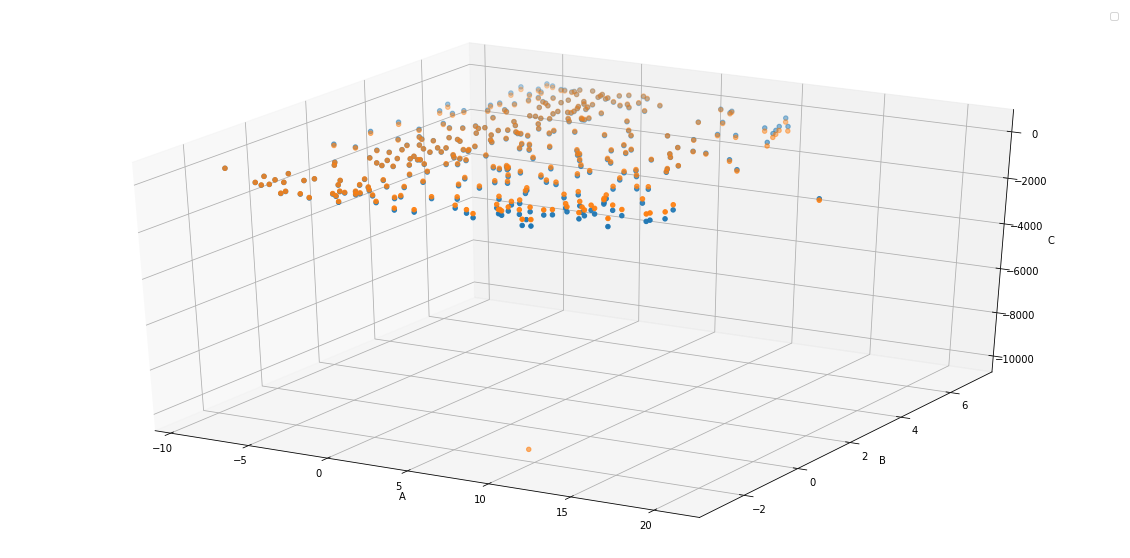

In [40]:
# let's plot the data to see what it looks like
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Yhat)
ax.scatter(X[:,0], X[:,1], Y)
ax.legend()
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('C')
plt.show()

### Orange dots are original Y and blue dots are model Yhat